In [2]:
# HomeWork 3
"""
Name: Harshith Gudapati
ID: BJ84775
"""

In [4]:
#1 
#1.1 (a)Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data = pd.read_csv('faithful.csv')

data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


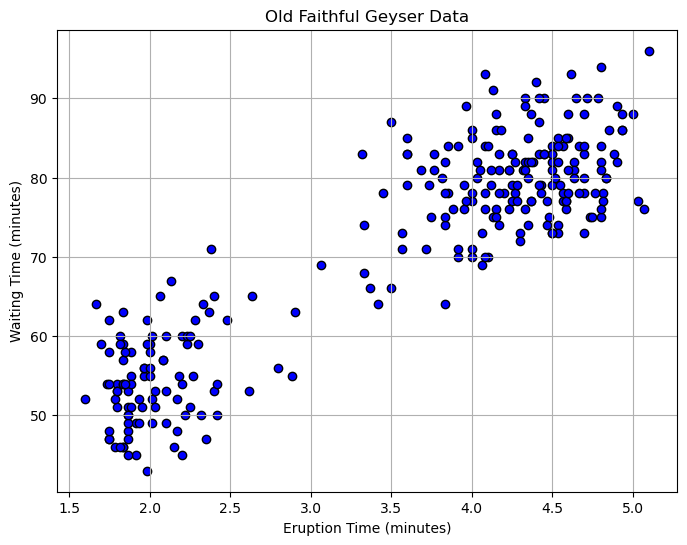

In [8]:
# Scatter plot of eruption time vs waiting time
plt.figure(figsize=(8,6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', edgecolor='k')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('Old Faithful Geyser Data')
plt.grid(True)
plt.show()

In [14]:
# 1.2: (b)	How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)
"""
Answer: Based on the scatter plot generated above i can observe upto 2 Clusters. 
we can see that there are two different blobs or group of points seperated by regions with fewer points.
"""

In [16]:
# 1.3: (c) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, 
#would this method be appropriate for this dataset? (10 points).
"""
Answer:
Steps of a Hierarchical Clustering Algorithm:**

1. we need to start by treating each data point as its own individual cluster.
2. Then we need to Calculate the distance (similarity) between all clusters.
3. After that we need two Merge the two closest clusters.
4. we then need to Update the distance matrix to reflect the merge.
5. we have to Repeat steps 2–4 until all points are merged into a single cluster or until a stopping criterion is reached.

Based on the scatter plot i think the hierarchial clustering could work for this dataset because there are only two clusters
and they are well seperated.

There are two types of hierarchial clustering one is agglomerative and the other is divisive.
"""


'\nAnswer:\nSteps of a Hierarchical Clustering Algorithm:**\n\n1. we need to start by treating each data point as its own individual cluster.\n2. Then we need to Calculate the distance (similarity) between all clusters.\n3. After that we need two Merge the two closest clusters.\n4. we then need to Update the distance matrix to reflect the merge.\n5. we have to Repeat steps 2–4 until all points are merged into a single cluster or until a stopping criterion is reached.\n\nBased on the scatter plot i think the hierarchial clustering could work for this dataset because there are only two clusters\nand they are well seperated.\n\nThere are two types of hierarchial clustering one is agglomerative and the other is divisive.\n'

In [22]:
"""
2. Implement the k-means algorithm in Python and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column, 
which contains instance ID numbers. In your notebook, including the following items:

2.1: (a)Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)
"""
# Extract features
X = data[['eruptions', 'waiting']].values

# K-means algorithm 
def k_means(X, k, max_iters=100, random_seed=42):
    np.random.seed(random_seed)
    
    # Randomly initializing centroids
    initial_centroids_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[initial_centroids_indices]
    
    objective_values = []
    
    for iteration in range(max_iters):
        # Assign clusters
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Saving previous centroids
        prev_centroids = centroids.copy()
        
        # Computing new centroids
        for idx, cluster in enumerate(clusters):
            if cluster:  # avoid division by zero
                centroids[idx] = np.mean(cluster, axis=0)
        
        # Computing objective function (sum of squared distances)
        sum_squared_distance = 0
        for idx, cluster in enumerate(clusters):
            for point in cluster:
                sum_squared_distance += np.linalg.norm(point - centroids[idx])**2
        objective_values.append(sum_squared_distance)
        
        # Checking for convergence (if centroids do not change)
        if np.allclose(centroids, prev_centroids):
            break
    
    # Assigning each point to a cluster index
    labels = np.zeros(len(X))
    for idx, point in enumerate(X):
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        labels[idx] = np.argmin(distances)
    
    return centroids, labels, objective_values

# Run k-means with 2 clusters (as determined in Problem 1)
k = 2
centroids, labels, objective_values = k_means(X, k)

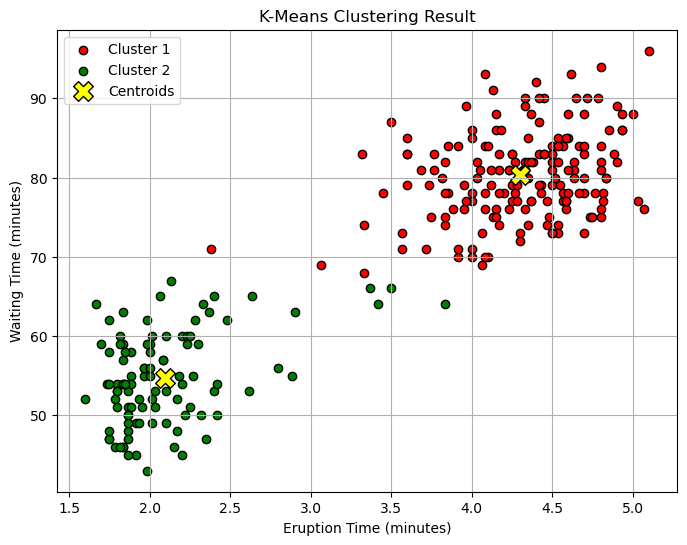

In [24]:
#2.2 (b)	A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points)

# Plot the clustered data points
plt.figure(figsize=(8,6))
colors = ['red', 'green']

for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], 
                c=colors[i], label=f'Cluster {i+1}', edgecolor='k')

# Plot centroids
plt.scatter(centroids[:,0], centroids[:,1], 
            c='yellow', marker='X', s=200, label='Centroids', edgecolor='k')

plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('K-Means Clustering Result')
plt.legend()
plt.grid(True)
plt.show()

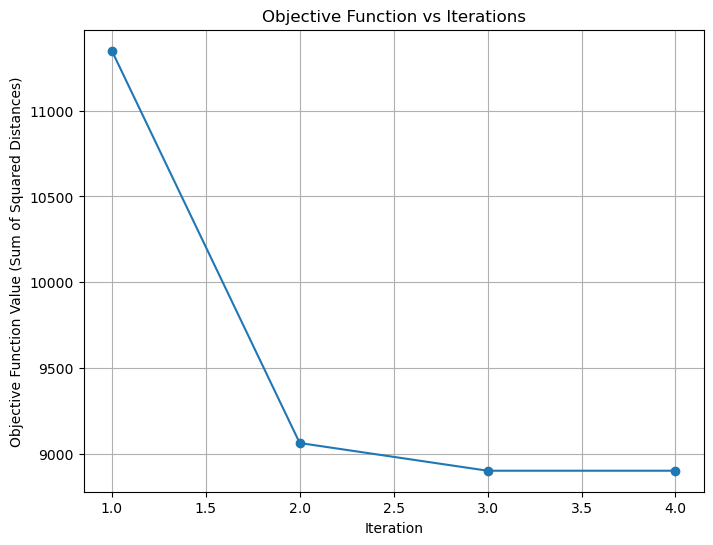

In [26]:
# 2.3: A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is  (10 points)
# Plot of Objective Function
plt.figure(figsize=(8,6))
plt.plot(range(1, len(objective_values)+1), objective_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Sum of Squared Distances)')
plt.title('Objective Function vs Iterations')
plt.grid(True)
plt.show()

In [ ]:
#2.4: (d)	Did the method manage to find the clusters that you identified in Problem 1? If not, 
#did it help to run the method again with another random initialization? (10 points)
"""
ANSWER: The K-means algorithm was able to sucessfully find the two clusters that were found in
the problem 1. The first time random seed was set to 42, this helped the method converge properly
with out the requirement of re-runs. If the parameters were set a bit differently we would have
needed to run the K-means multiple times.
"""
